In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
faces = fetch_lfw_people(min_faces_per_person=70)

In [4]:
faces.data.shape

(1288, 2914)

In [5]:
a =faces.images[0].shape

In [6]:
print(a)

(62, 47)


In [7]:
name=faces.target_names

In [8]:
print(name)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [9]:
data = faces.data

In [10]:
target = faces.target

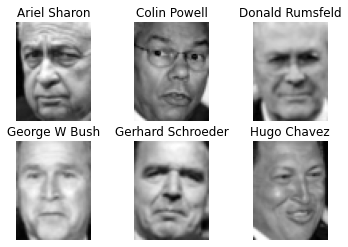

In [11]:
for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = data[target==i][50]
    plt.imshow(x.reshape(62,47),cmap='gray')
    plt.title(faces.target_names[i])
    plt.axis('off')
plt.show()

In [12]:
c = np.unique(faces.target)

In [13]:
print(c)

[0 1 2 3 4 5 6]


In [14]:
 d = np.bincount(faces.target)

In [15]:
print(d)

[ 77 236 121 530 109  71 144]


In [16]:
data.shape

(1288, 2914)

In [17]:
target.shape

(1288,)

In [18]:
x = faces.data
np.isnan(np.sum(data))
np.isnan(np.sum(target))

False

In [19]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
datatrain,datatest,targettrain,targettest = train_test_split(data,target,test_size=.2,random_state=20,shuffle=True)

In [21]:
e = datatrain.shape

In [22]:
print(e)

(1030, 2914)


In [23]:
f = datatest.shape

In [24]:
print(f)

(258, 2914)


In [25]:
max_ = datatrain.max()

In [26]:
print(max_)

255.0


In [27]:
datatrain = datatrain/255.0

In [28]:

datatest = datatest/255.0

In [29]:
datatrain.max()

1.0

In [30]:
pca = PCA(n_components=.97)

In [31]:
pca_train = pca.fit_transform(datatrain)

In [32]:
pca_test = pca.transform(datatest)*


In [33]:
s = pca_train.shape

In [34]:
print(s)

(1030, 217)


In [35]:
r = pca_test.shape

In [36]:
r = pca_test.shape

In [37]:
log_model = LogisticRegression(solver='liblinear')

In [38]:
log_model.fit(pca_train,targettrain)

LogisticRegression(solver='liblinear')

In [39]:
test_score = log_model.score(pca_test,targettest)
train_score = log_model.score(pca_train,targettrain)

In [40]:
print(test_score)

0.8565891472868217


In [41]:
print(train_score)

0.983495145631068


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 

grid = GridSearchCV(SVC(), param_grid, verbose = 3)

In [45]:
grid.fit(pca_train, targettrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.413, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.408, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.408, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.408, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.408, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.835, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.859, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.850, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.854, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.422, total=   0.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.422, total=   0.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.422, total=   0.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.427, total=   0.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.413, total=   0.8s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.825, total=   0.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.825, total=   0.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.850, total=   0.3s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.796, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.830, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.806, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.835, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.820, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.772, total=   0.5s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.825, total=   0.3s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.820, total=   0.3s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.850, total=   0.3s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.796, total=   0.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.825, total=   0.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.840, total=   0.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.845, total=   0.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.811, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.825, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.825, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.820, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.850, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.796, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.825, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [46]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [47]:
svm_model = SVC(kernel='linear',gamma = 1, C=0.1)


In [48]:
svm_model.fit(pca_train,targettrain)


SVC(C=0.1, gamma=1, kernel='linear')

In [49]:
test_score = svm_model.score(pca_test,targettest)

In [50]:
print(test_score)

0.8527131782945736


In [51]:
train_score = svm_model.score(pca_train,targettrain)

In [52]:
print(train_score)

0.974757281553398


# TESTING THE MODEL 

# CASE 1: 

In [53]:
img = 'George-W-Bush.jpeg'

In [54]:
img1 = cv2.imread(img)
rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

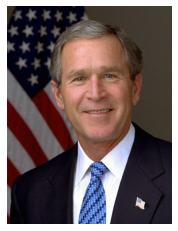

In [55]:
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [56]:
def getface(image): 
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('frontal_face.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        face = img[y:y + h, x:x + w]
        cv2.imwrite('face.jpeg', face)
    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()
getface(img)

In [57]:
test_sample = cv2.imread('face.jpeg',0)

In [58]:
t_shape = test_sample.shape

In [59]:
print(t_shape)

(617, 617)


In [60]:
t = cv2.resize(test_sample,(47,62))

In [61]:
print(t.shape)

(62, 47)


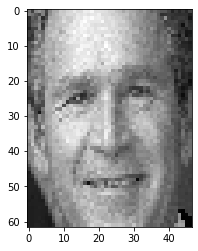

In [62]:
plt.imshow(t,cmap='gray')
plt.show()

In [63]:
t_reshape = t.reshape(1,-1)

In [64]:
print(t_reshape.shape)

(1, 2914)


In [65]:
t_reshape.max()

211

In [66]:
t1 = t_reshape/t_reshape.max()

In [67]:
max__ = t1.max()

In [68]:
print(max__)

1.0


In [69]:
t2 = pca.transform(t1)

In [70]:
x = t2.shape

In [71]:
print(x)

(1, 217)


In [72]:
target= {0:'Ariel Sharon', 1: 'Colin Powell', 2: 'Donald Rumsfeld', 3: 'George W Bush',4:'Gerhard Schroeder', 5: 'Hugo Chavez', 6: 'Tony Blair'}

In [73]:
pred1 = log_model.predict(t2)

In [74]:
print(pred1)

[3]


In [75]:
# Since the value at target index 3 corresponds with Hugo George W Bush our predictions are CORRECT and the model is performing well.

# CASE 2 :

In [76]:
img = 'hugo-chavez.jpg'

In [77]:
img1 = cv2.imread(img)

rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

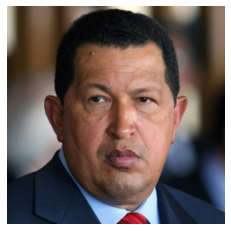

In [78]:
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [79]:
def getface(image): 
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('frontal_face.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        face = img[y:y + h, x:x + w]
        cv2.imwrite('face.jpg', face)
    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()
getface(img)

In [80]:
test_sample1 = cv2.imread('face.jpg',0)
test_sample1.shape

(719, 719)

In [81]:
t1 = cv2.resize(test_sample1,(47,62))
t1.shape

(62, 47)

In [82]:
t2 = t1.reshape(1,-1)
t2.shape

(1, 2914)

In [83]:
t1.max()

220

In [84]:
t3 = t2/t2.max()

In [85]:
t3.max()

1.0

In [86]:
target= {0:'Ariel Sharon', 1: 'Colin Powell', 2: 'Donald Rumsfeld', 3: 'George W Bush',4:'Gerhard Schroeder', 5: 'Hugo Chavez', 6: 'Tony Blair'}

In [87]:
t4 = pca.transform(t3)

In [88]:
print(t4.shape)

(1, 217)


In [89]:
pred2 = svm_model.predict(t4)

In [90]:
print(pred2)

[5]


In [91]:
# Since the value at target index 5 corresponds with Hugo Chavez our predictions are CORRECT and the model is performing well.